In [1]:
#Example EOF analysis

In [2]:
#global datasets 
#https://scitools-iris.readthedocs.io/en/latest/installing.html
#conda install -c conda-forge iris
#conda install -c conda-forge iris-sample-data

#https://ajdawson.github.io/eofs/latest/
#eof tool
#conda install -c conda-forge eofs

#additional tools
#conda install -c conda-forge netcdf4
#conda install -c conda-forge matplotlib
#conda install -c conda-forge cartopy

#conda install -c anaconda xarray

In [3]:
"""
Compute and plot the leading EOF of sea surface temperature in the
central and northern Pacific during winter time.

The spatial pattern of this EOF is the canonical El Nino pattern, and
the associated time series shows large peaks and troughs for well-known
El Nino and La Nina events.

This example uses the plain numpy interface.

Additional requirements for this example:

    * netCDF4 (http://unidata.github.io/netcdf4-python/)
    * matplotlib (http://matplotlib.org/)
    * cartopy (http://scitools.org.uk/cartopy/)

"""

'\nCompute and plot the leading EOF of sea surface temperature in the\ncentral and northern Pacific during winter time.\n\nThe spatial pattern of this EOF is the canonical El Nino pattern, and\nthe associated time series shows large peaks and troughs for well-known\nEl Nino and La Nina events.\n\nThis example uses the plain numpy interface.\n\nAdditional requirements for this example:\n\n    * netCDF4 (http://unidata.github.io/netcdf4-python/)\n    * matplotlib (http://matplotlib.org/)\n    * cartopy (http://scitools.org.uk/cartopy/)\n\n'

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from eofs.standard import Eof
from eofs.examples import example_data_path
import xarray as xr

C:\Users\mafmo\anaconda3\envs\EOF\lib\site-packages\pyproj\__init__.py:90: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [5]:
# Read SST anomalies using the netCDF4 module. The file contains
# November-March averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
ncin     = Dataset(filename, 'r')

In [48]:
for dim in ncin.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 50
<class 'netCDF4._netCDF4.Dimension'>: name = 'bound', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 18
<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 30


In [49]:
###select all these variables available 
sst  = ncin.variables['sst'][:]
lons = ncin.variables['longitude'][:]
lats = ncin.variables['latitude'][:]

###close the file
ncin.close()

In [50]:
###Which kind of solvers are available?. Applies preprocessing to the data. Processing lat data
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(lats))
wgts   = np.sqrt(coslat)[..., np.newaxis]

In [51]:
###Why are the weights needed? Which other wheights can be used
solver = Eof(sst, weights=wgts)
#solver = Eof(sst, weights='coslat')

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1  = solver.pcs(npcs=1, pcscaling=1)

Text(0.5, 1.0, 'EOF1 expressed as correlation')

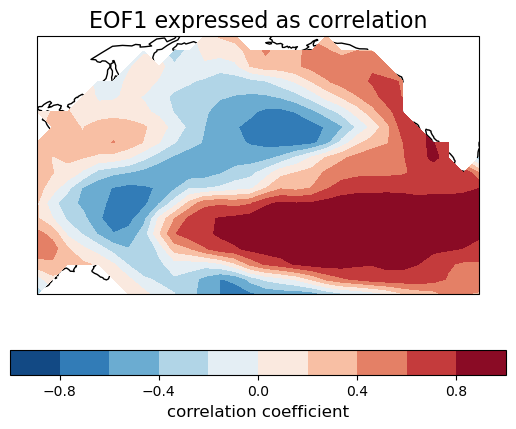

In [52]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax    = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill  = ax.contourf(lons, lats, eof1.squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
plt.title('EOF1 expressed as correlation', fontsize=16)

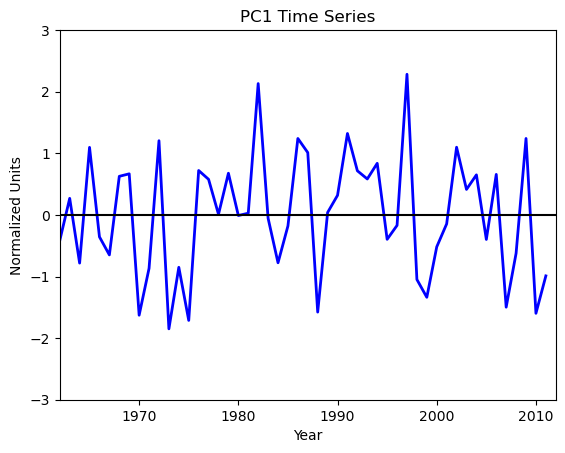

In [53]:
# Plot the leading PC time series.
plt.figure()
years = range(1962, 2012)
plt.plot(years, pc1, color='b', linewidth=2)
plt.axhline(0, color='k')
plt.title('PC1 Time Series')
plt.xlabel('Year')
plt.ylabel('Normalized Units')
plt.xlim(1962, 2012)
plt.ylim(-3, 3)

plt.show()

In [11]:
dfm_file           = r"C:\Users\mafmo\CISNE\hybrid-spm\SPM\DWSM-FM_100m_0000_map_regular_500_400_SPM.nc"
cms_file           = r"C:\Users\mafmo\CISNE\hybrid-spm\SPM\2015_2020_P1D_HROC_L3-transp_NWS_31_32ULE_100m-v01.nc"

#netCDF4 object
dfm_net        = Dataset(dfm_file)
cms_net        = Dataset(cms_file)
#for var in dfm.variables.values():
    #print(var)
    
#xarray object
dfm_xr = xr.open_dataset(dfm_file)
cms_xr = xr.open_dataset(cms_file)
for var in dfm_xr.variables.values():
    print(var)

<xarray.IndexVariable 'lon' (lon: 500)>
array([4.003125, 4.010273, 4.017422, ..., 7.556015, 7.563164, 7.570312],
      dtype=float32)
Attributes:
    axis:                 X
    reference:            geographical coordinates, WGS84 projection
    units:                degrees_east
    _CoordinateAxisType:  Lon
    long_name:            longitude
    valid_max:            180
    valid_min:            -180
<xarray.IndexVariable 'lat' (lat: 400)>
array([52.55104 , 52.554604, 52.55817 , ..., 53.96579 , 53.969353, 53.972916],
      dtype=float32)
Attributes:
    axis:                 Y
    reference:            geographical coordinates, WGS84 projection
    units:                degrees_north
    _CoordinateAxisType:  Lat
    long_name:            latitude
    valid_max:            90
    valid_min:            -90
<xarray.IndexVariable 'layer' (layer: 1)>
array([-0.05], dtype=float32)
Attributes:
    axis:                    Z
    reference:               geographical coordinates, WGS84 pr

In [55]:
dfm = dfm_net
cms = cms_net

In [56]:
var    = [i for i in list(dfm.variables) if 'mesh' in i]
units  = [dfm[i].units for i in var]
naming = ['SPM']

In [57]:
for dim in dfm.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 366
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 500
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 400
<class 'netCDF4._netCDF4.Dimension'>: name = 'layer', size = 1


In [58]:
###select all these variables available 
sst_test  = dfm.variables['mesh2d_water_quality_output_9'][:]
lons_test = dfm.variables['lon'][:]
lats_test = dfm.variables['lat'][:]

###close the file
dfm.close()

C:\Users\mafmo\AppData\Local\Temp\ipykernel_28896\1078029809.py:3: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  lons_test = dfm.variables['lon'][:]
C:\Users\mafmo\AppData\Local\Temp\ipykernel_28896\1078029809.py:3: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  lons_test = dfm.variables['lon'][:]
C:\Users\mafmo\AppData\Local\Temp\ipykernel_28896\1078029809.py:4: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  lats_test = dfm.variables['lat'][:]
C:\Users\mafmo\AppData\Local\Temp\ipykernel_28896\1078029809.py:4: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  lats_test = dfm.variables['lat'][:]


In [59]:
###Which kind of solvers are available?. Applies preprocessing to the data. Processing lat data
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat_test = np.cos(np.deg2rad(lats_test))
wgts_test   = np.sqrt(coslat_test)[..., np.newaxis]

In [60]:
sst_test2 = sst_test[:,:,:,0]
print(sst_test.shape)
print(sst_test2.shape)

(366, 400, 500, 1)
(366, 400, 500)


In [61]:
###Why are the weights needed? Which other wheights can be used
solver = Eof(sst_test2, weights=wgts_test)
#solver = Eof(sst, weights='coslat')

In [62]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1  = solver.pcs(npcs=1, pcscaling=1)

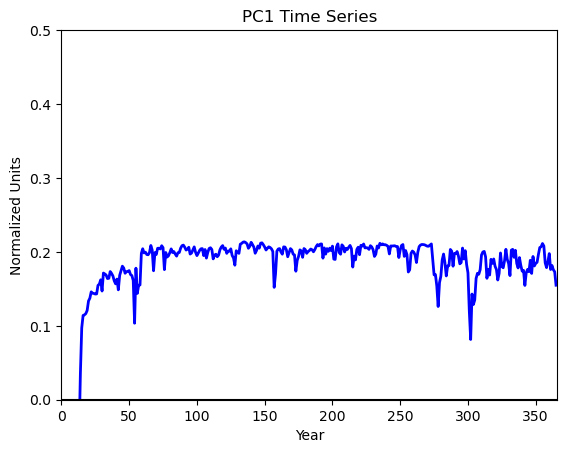

In [40]:
# Plot the leading PC time series.
plt.figure()
years = range(0, 366)
plt.plot(years, pc1, color='b', linewidth=2)
plt.axhline(0, color='k')
plt.title('PC1 Time Series')
plt.xlabel('Year')
plt.ylabel('Normalized Units')
plt.xlim(0, 366)
plt.ylim(-0, 0.5)

plt.show()

In [ ]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax    = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill  = ax.contourf(lons, lats, eof1.squeeze(), clevs,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r)

ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
plt.title('EOF1 expressed as correlation', fontsize=16)